# Part I - QS University Ranking 2023 Data Exploration
## by (Dauda Sani Abdullahi)

## Introduction
The [QS World University Rankings 2023](https://www.topuniversities.com/university-rankings/world-university-rankings/2023) feature over 1,400 universities from around the world, Institutions are assessed across six categories (or indicators) to effectively capture university performance. The dataset can be found [here](https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223)

##### Features (Indicators) Description:
- `ar score`: academic reputation Accounts for 40% of the overall score, academic reputation looks at the teaching and research quality at the world’s universities, derived from a survey of academic staff worldwide. 
- `er score`: employment score Accounts for 10% of the overall score, assess how institutions prepare students for successful careers, and which institutions provide the most competent, innovative, and effective graduates.  
- `fsr score`: faculty/student ratio accounts for 20% of the overall score, This indicator recognises that a high number of academics per student reduces the teaching burden and creates a more supportive student experience.
- `ifr  score`: international faculty ratio accounts for 5% of the overall score,  It demonstrates the ability to attract quality international staffs, and it implies a highly global outlook.
- `isr score`: - international student ratio accounts for 5% of the overall score, It demonstrates the ability to attract quality international students, and it implies a highly global outlook.  
- `cpf score`: - citation per faculty ratio accounts for 20% of the overall score, research quality with a citation per faculty metric, taking the total number of academic citations in papers produced by a university in a five-year period.
- `irn score`:- internation research network
- `ger score`: - employment outcome
- and all of the indicators above have their respective rankings.

## Preliminary Wrangling

In [1]:
#imports all the libraries to be used here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette(['tab:purple','orange'])

In [2]:
#load the dataset and it's statistics
uni_df = pd.read_csv('university2023.csv')

In [3]:
#first 5 rows
uni_df.head()

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [4]:
#data types, number of rows and columns and number of missing values
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

> Some Indicators has missing values, let's explore and see what can be done

In [5]:
#handling score scaled datatype.
uni_df['score scaled'].replace('-',np.nan, inplace=True)
uni_df['score scaled'] = uni_df['score scaled'].astype('float')

In [6]:
#Handling missing Values
null = uni_df.isnull().sum()
null[null>0].sort_values().to_frame(name='No. Missing Values')

,No. Missing Values
er score,1
fsr score,2
cpf score,5
ger score,12
ger rank,12
irn score,13
irn rank,13
isr score,57
isr rank,57
ifr score,98


> Since the missing values are not that much, we will filter them when the need arise.

In [7]:
#check duplicates values
uni_df.duplicated().any()

False

In [8]:
#descriptive statistics
uni_df.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
count,1422.000000,1422.000000,1421.000000,1420.000000,1417.000000,1324.000000,1365.000000,1409.000000,1410.000000,500.000000
mean,711.500000,20.124684,20.657143,29.997113,24.529358,31.659517,26.545348,49.570121,26.186809,44.619400
std,410.640354,22.802706,24.027928,28.172207,27.910952,34.170817,30.896854,30.205439,26.201036,18.655057
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.200000
25%,356.250000,5.400000,4.400000,8.200000,3.100000,4.800000,3.300000,21.600000,6.700000,29.800000
50%,711.500000,10.800000,10.300000,18.250000,11.100000,13.750000,10.800000,47.700000,15.500000,38.550000
75%,1066.750000,23.775000,27.000000,43.500000,39.400000,55.075000,40.500000,77.600000,36.900000,54.500000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### What is the structure of your dataset?

> The dataset consist of 1422 universities and 21 features (with 6 important indicators). Most of the variables are numeric, only few are categorical

### What is/are the main feature(s) of interest in your dataset?

> I am more concern with the ranking and six rating indicators (ar score, er score, ifr score, isr score, fsr score, and cpf score),ranking, and location. But i will explore the other indicators and see their importance in University ranking.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that all the six indicators will help but academic reputation and faculty/student ratio will have a significant effect.

## Univariate Exploration

##### Custom functions

In [9]:
def plot_hist(x,df=uni_df):
    '''
    This function plot the distribution of x
    inputs:
        df: the dataframe to extract the data from
        x: the column to plot
    return:
        a histogram plot
    '''
    #plt.subplot(1,2,1)
    plt.figure(figsize=[8, 5])
    binsize = 3
    bins = np.arange(0, df[x].max()+binsize, binsize)    
    plt.hist(data = df, x = x, bins = bins)
    plt.title(f'Distribution of {x}')
    plt.xlabel(x)

In [10]:
def plot_log_hist(x,df=uni_df):
    '''
    This function plot the distribution of x
    inputs:
        df: the dataframe to extract the data from
        x: the column to plot
    return:
        a histogram plot
    '''
    #plt.subplot(1,2,1)
    plt.figure(figsize=[8, 5])
    binsize = 0.05
    max = np.log10(df[x].describe())['max']
    bins = 10 ** np.arange(0, max+binsize, binsize)    
    plt.hist(data = df, x = x, bins = bins, color='tab:purple')
    plt.title(f'Log Distribution of {x}')
    plt.xlabel(x)
    plt.xscale('log')
    plt.xticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);

1. Countries with the most rated Universities.

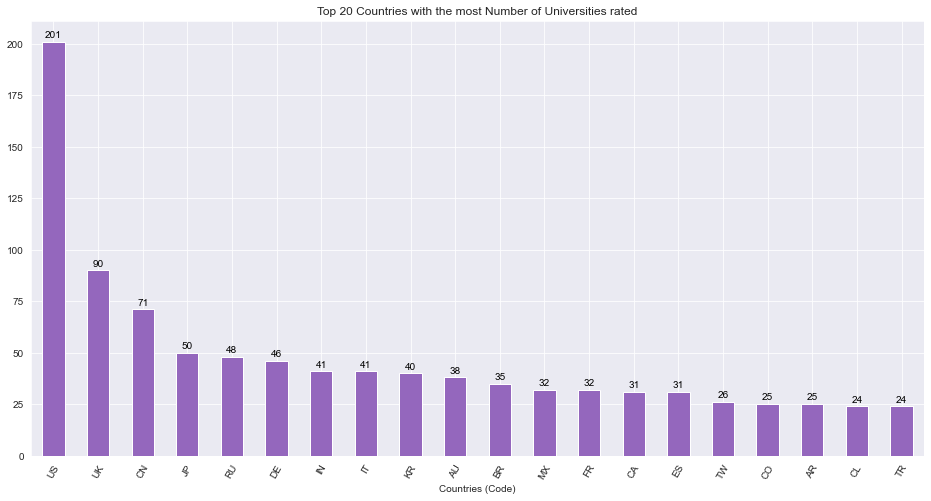

In [11]:
#plot countries with number of universities rated
plt.figure(figsize=(16,8))
code_order = uni_df['location code'].value_counts().sort_values(ascending=False)[:20]
uni_df['location code'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Top 20 Countries with the most Number of Universities rated')
plt.xlabel('Countries (Code)')
#plt.ylabel('Number of University')
#get the current tick location and labels
locs, labels = plt.xticks(rotation=60)
for loc, label in zip(locs,labels):
    
    # get the text property for the label to get the correct count
    count = code_order[label.get_text()]
    
    #convert count into % e.g 109 = 109*100/n_pokemon
    pct_string = '{}'.format(count)
 
    #print on the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black')

> The United State (US) has the most universities ranked, with 201 Universities on the ranked list, followed by United kingdom (UK) with 90 Universities on the list, then Canada with 71 Universities and the rest.

2. Distribution of academic reputation ratio

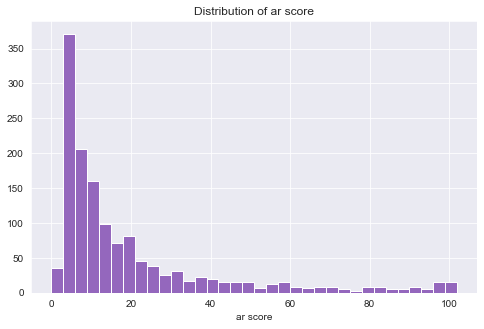

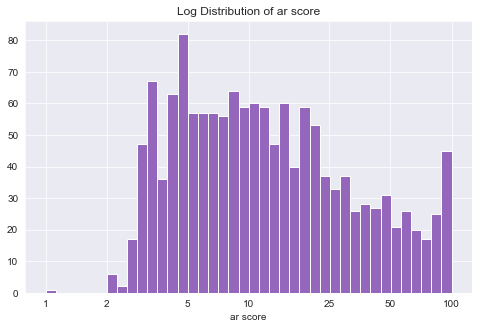

In [12]:
plot_hist('ar score')
plot_log_hist('ar score')

> academic reputation (ar score) is skewed to the right with a lot of universities with lower score, and few on the high academic reputation score end. When plotted on a log-scale, the academic reputation score distribution looks roughly unimodal, with only one peak around 5.

3. Distribution of employment reputation score

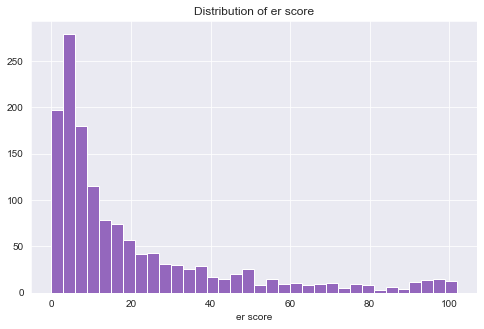

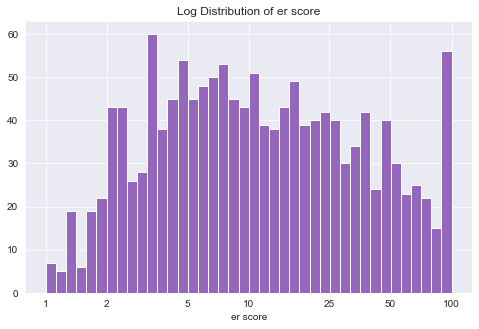

In [13]:
plot_hist('er score')
plot_log_hist('er score')

> Employment reputation (er score) is also skewed to the right, with a lot of universities with lower score, and few on the high employment reputation score end. When plotted on a log-scale, the employment reputation score distribution looks roughly unimodal, with only one peak around 2 and 5, and one closer to the peak towards the end.

4. Distribution of faculty/student ratio

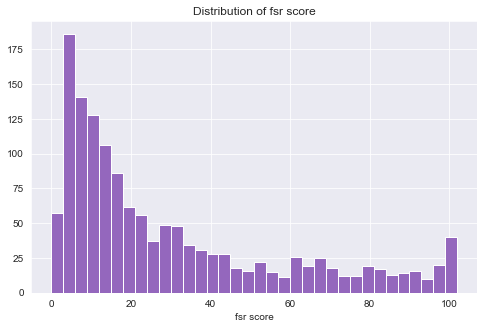

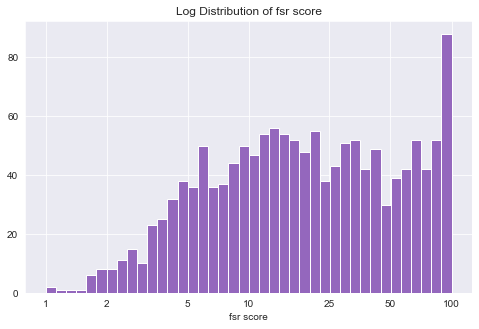

In [14]:
plot_hist('fsr score')
plot_log_hist('fsr score')

> faculty/student ratio (fsr score) is also skewed to the right with a lot of universities with lower score, and few on the high score end. When plotted on a log-scale, the fsr score distribution looks roughly unimodal, with one only one peak at the end.

5. Distribution of International faculty ratio

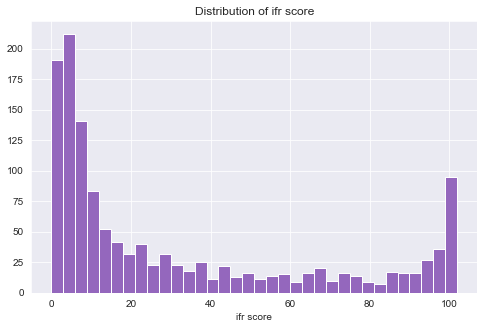

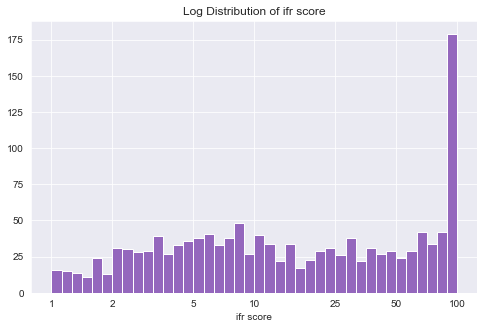

In [15]:
plot_hist('ifr score')
plot_log_hist('ifr score')

> international faculty ratio (ifr score) is roughly skewed to the right with a U-shape look with a lot of universities with lower score, and few on the high score end. When plotted on a log-scale, the distribution looks the differences between points aren't much, with one only one peak at the end.

6. Distribution of International student ratio

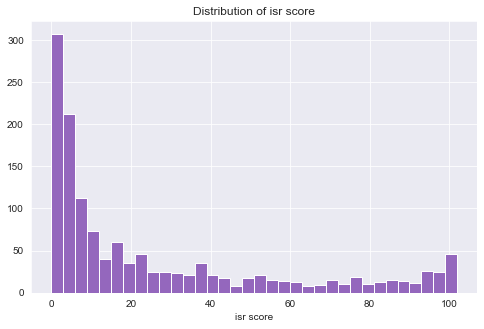

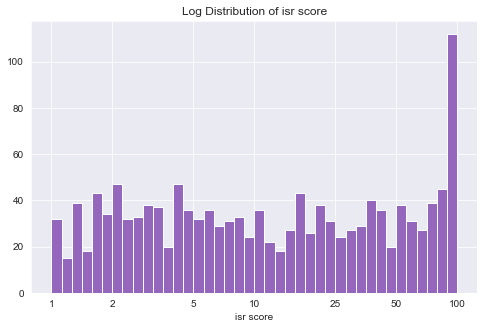

In [16]:
plot_hist('isr score')
plot_log_hist('isr score')

> international student ratio (isr score) is skewed to the right with a lot of universities with lower score, and few on the high end. When plotted on a log-scale, the distribution has one peak at the end and fewer differences between the other points.

7. Distribution of Citation per faculty

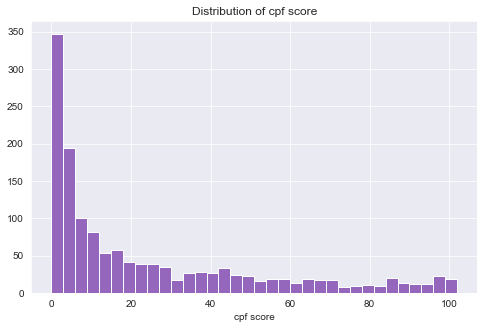

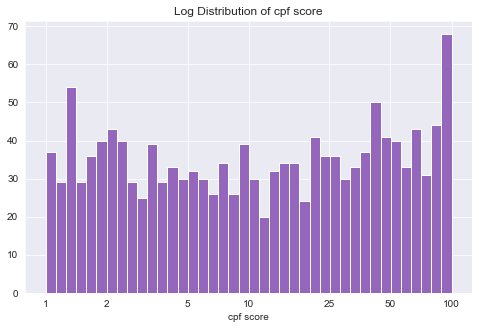

In [17]:
plot_hist('cpf score')
plot_log_hist('cpf score')

> citation per faculty (cpf score) is skewed to the right with a lot of universities with lower score, and few on the high citation per faculty score end. When plotted on a log-scale, the distribution looks roughly equal, with only one peak at the end.

8. Distribution of International research network

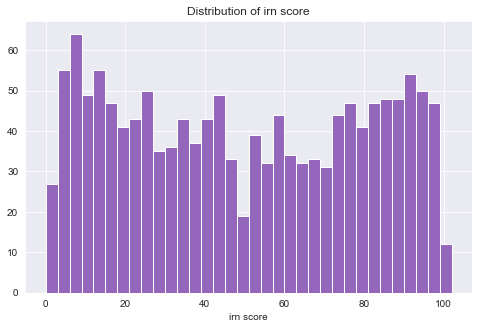

In [18]:
plot_hist('irn score')

> International research network (irn score) has a bimodal distribution with most of the data around 0 to 20 while the second peak is around 80 to 100 on the score line.

9. Distribution of Employment Outcome

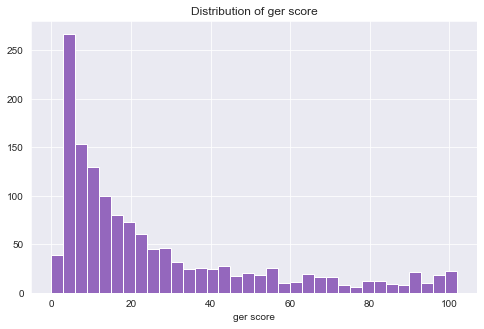

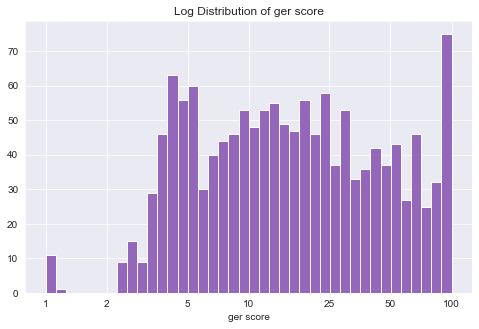

In [19]:
plot_hist('ger score')
plot_log_hist('ger score')

> Employment Outcome (ger score) is skewed to the right with a lot of universities with lower score, and few on the high score end. When plotted on a log-scale, the distribution looks roughly unimodal, with only one peak at the end.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> USA has the highest Number of universities rated with 201, followed by UK with 90, Canada with 71. The six ranking indicators when ploted have right skewed distribution but when log-scale is applied most tend to be unimodal with only one peak at diffrent location of the distribution. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unsual distributions and I didn't perform any tidiness on the data.

## Bivariate Exploration

Let's start by investigating relationship between the ranking indicators (ar score, er score, ifr score, isr score, fsr score, and cpf score)

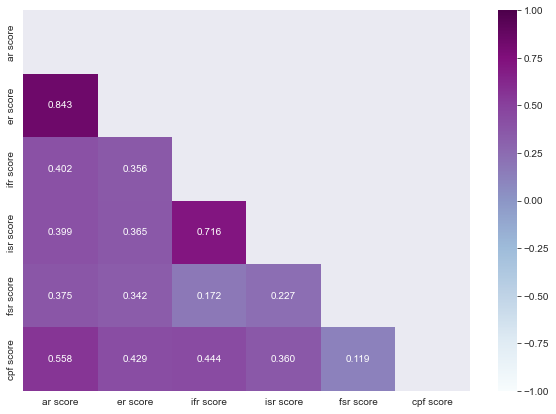

In [20]:
ranking_ind = ['ar score', 'er score', 'ifr score', 'isr score', 'fsr score', 'cpf score']
corrmatrix = uni_df[ranking_ind].corr()
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)]=True
# correlation plot
plt.figure(figsize = [10, 7])
sns.heatmap(corrmatrix, vmax=1, vmin=-1, annot = True, mask=mask, fmt = '.3f',
           cmap = 'BuPu', center = 0) 
plt.show()

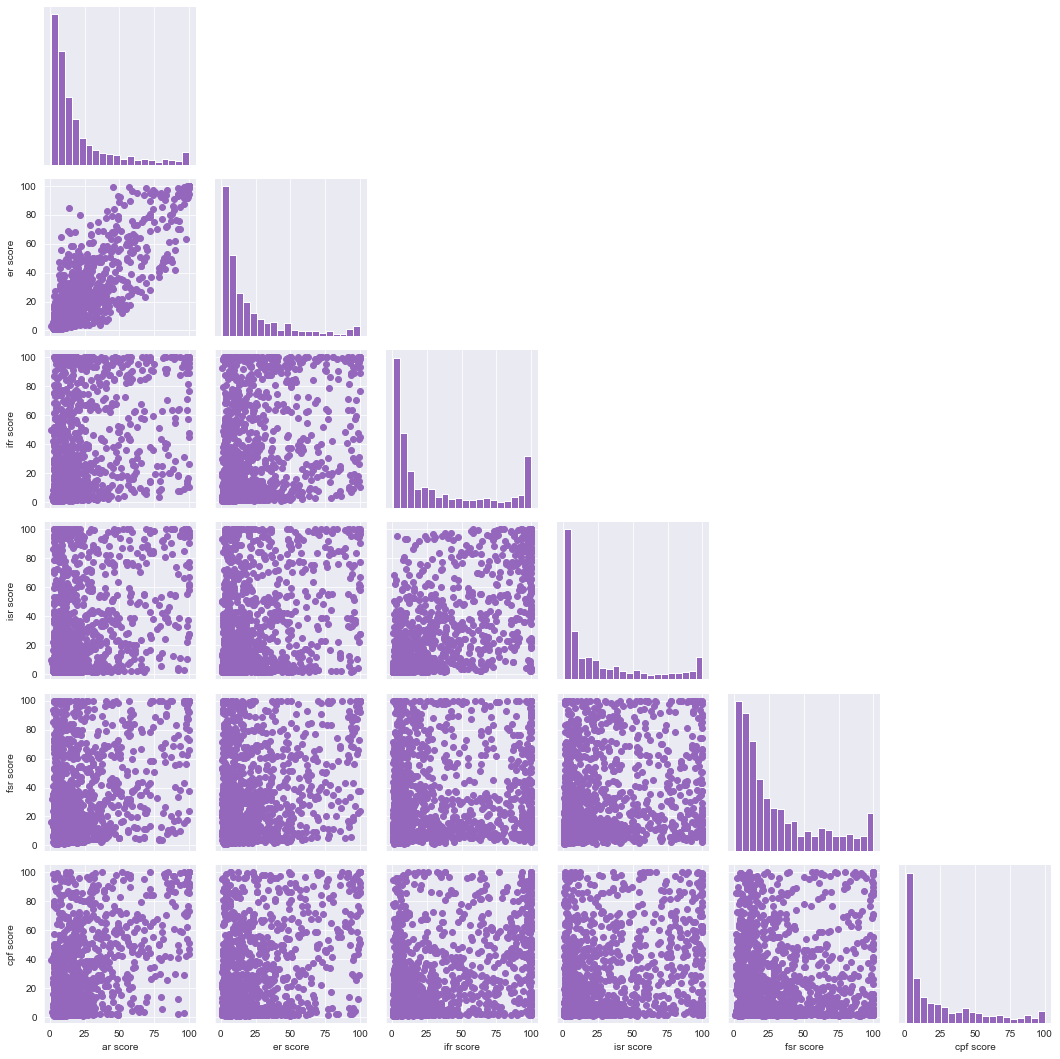

In [21]:
# lets see the result of the correlation in pairwise plot
g = sns.PairGrid(data = uni_df, vars = ranking_ind, diag_sharey = False, corner = True,)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> From the heatmap plot we can see that there's no Negative correlation, must of the correlations are weaker only two high correlations were seen in ar score and er score which has high correlation of 0.8, followed by isr score and ifr score with 0.7. But when visualize on scatter plots is only the correlation between ar score and er score that can be seen visually, the correlation between isr score and ifr score nearly shows.

Let's explore the two relationships more further. 
1. Relationship between academic reputation (ar score) and Employment relationship (er score)

Text(0, 0.5, 'Employment reputation (er score)')

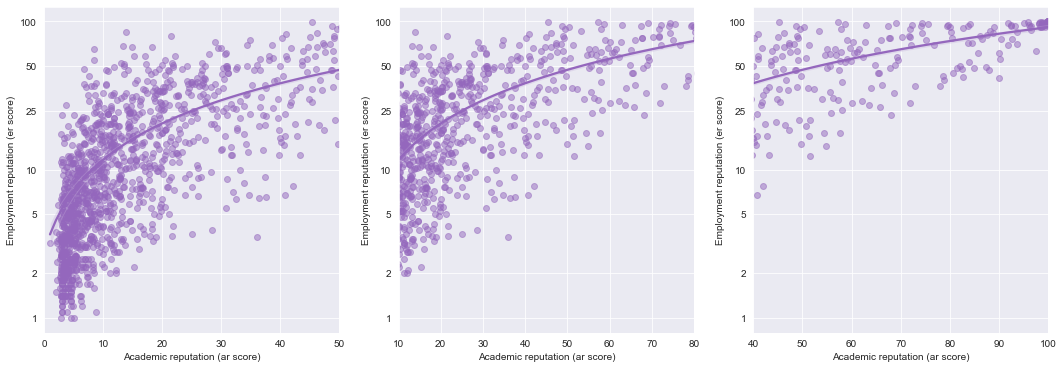

In [47]:
#applying log transformation on the y-axis and viewing it to see clear relationship between ar score and er score
plt.figure(figsize = [18, 6])
plt.subplot(1,3,1)
sns.regplot(data = uni_df, x = 'ar score', y = 'er score', scatter_kws={'alpha':1/2})
plt.xlim([0, 50])
plt.xlabel('Academic reputation (ar score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('Employment reputation (er score)')

plt.subplot(1,3,2)
sns.regplot(data = uni_df, x = 'ar score', y = 'er score', scatter_kws={'alpha':1/2})
plt.xlim([10, 80])
plt.xlabel('Academic reputation (ar score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('Employment reputation (er score)')

plt.subplot(1,3,3)
sns.regplot(data = uni_df, x = 'ar score', y = 'er score', scatter_kws={'alpha':1/2})
plt.xlim([40, 100])
plt.xlabel('Academic reputation (ar score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('Employment reputation (er score)')

> From the above Scatter plots we can see that a clear Linear relationship is between academic reputation (ar score) and employment reputation(er score)  when the points are zoom the third subplot. where we can see that a high ar score result in higher er score.

2. Relationship between International student ratio (isr score) and international faculty ratio (ifr)

Text(0, 0.5, 'International Student ratio (isr score)')

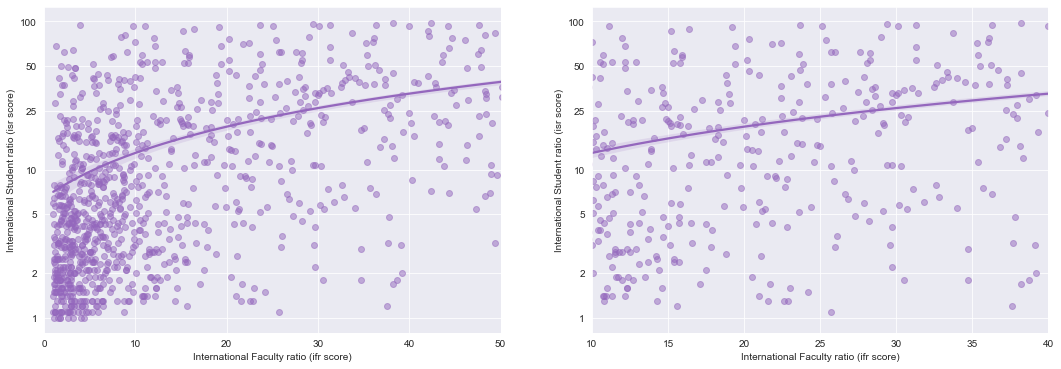

In [23]:
#applying log transformation on the y-axis and viewing it to see clear relationship between ifr score and isr score. 
plt.figure(figsize = [18, 6])
plt.subplot(1,2,1)
sns.regplot(data = uni_df, x = 'ifr score', y = 'isr score', scatter_kws={'alpha':1/2})
plt.xlim([0, 50])
plt.xlabel('International Faculty ratio (ifr score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('International Student ratio (isr score)')

plt.subplot(1,2,2)
sns.regplot(data = uni_df, x = 'ifr score', y = 'isr score', scatter_kws={'alpha':1/2})
plt.xlim([10, 40])
plt.xlabel('International Faculty ratio (ifr score)')
plt.yscale('log')
plt.yticks([1,2,5,10,25,50,100],[1,2,5,10,25,50,100]);
plt.ylabel('International Student ratio (isr score)')


> The data is too sparse that we cannot see a clear linear relationship.

Due to the too much values we have in the categorical feature we have, let's filter it to consist of only US,UK, and Canada (CN) and see the relationship with the six ranking indicators

In [24]:
uni_df1 = uni_df[uni_df['location code'].isin(['US','UK','CN'])]
uni_df1['location code'].value_counts()

US    201
UK     90
CN     71
Name: location code, dtype: int64

In [25]:
#relationship between locations and the six indicators.
def plot_cat_rel(x,df=uni_df1):
    '''
    This function plots a boxplot that shows the relationship between the University locations and the six ranking indicators
    inputs:
        df: the dataframe to extract the data from
        x: the column to plot
    return:
        a box plot depicting a relationship.
    '''
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(data=uni_df1, x='location code', y=x, color='tab:purple')
    plt.xlabel('University Location')
    plt.subplot(1,2,2)
    sns.violinplot(data=uni_df1, x='location code', y=x, inner=None, color='tab:purple')
    plt.xlabel('University Location')

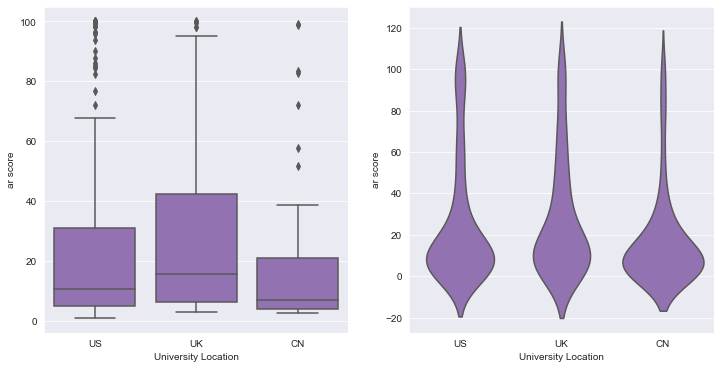

In [26]:
plot_cat_rel('ar score')

Firstly, we can say that there is a correlation between ar score and university location. University in the UK tend to have more ar score rating compare to the others as we can see the variability in UK compare to US and Canada. and lots of outliers in the US as compare to UK and Canada. the Violin plot shows more data are dispersed  with ar score between 0 and 20 in Canada compare to the US and UK.

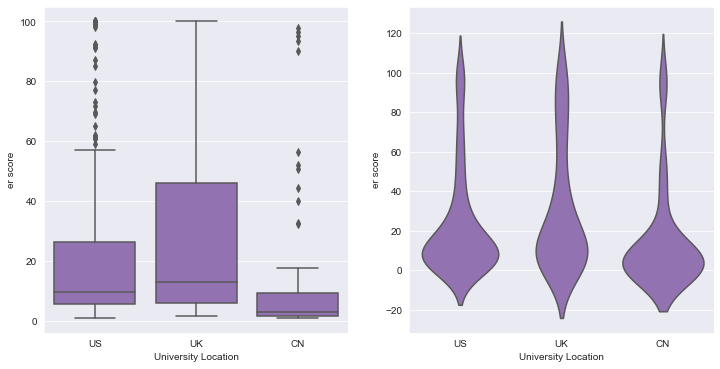

In [27]:
plot_cat_rel('er score')

The minimum of UK ar score is higher than the medium of Canada, we can say UK has score more academic reputation than Canada and so also the US. still Canada has dispersed datapoints. 

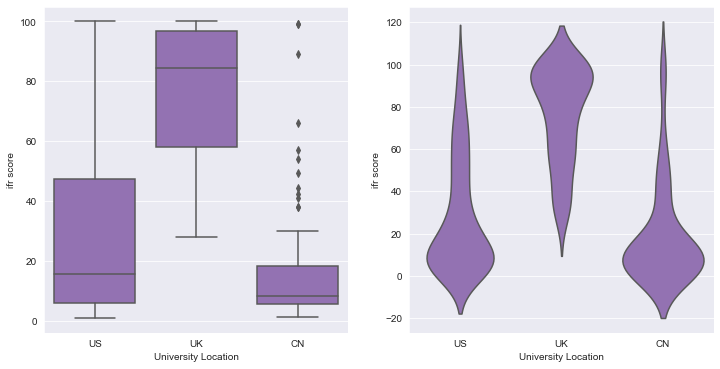

In [28]:
plot_cat_rel('ifr score')

None of the three countries match UK in terms international Faculty ratio, they have lots of international scholars working in the university. 

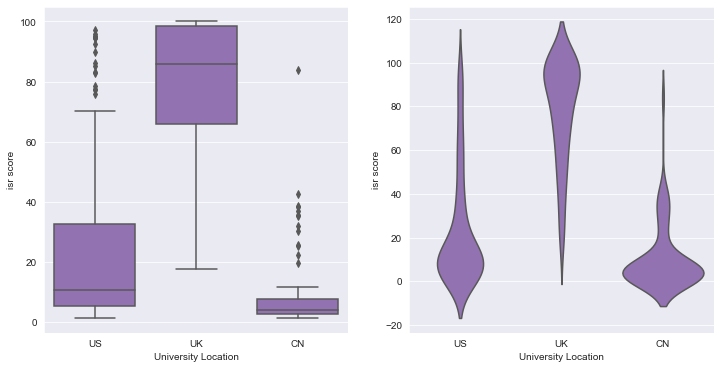

In [29]:
plot_cat_rel('isr score')

So also with the International student ratio, UK is the pacesetter.

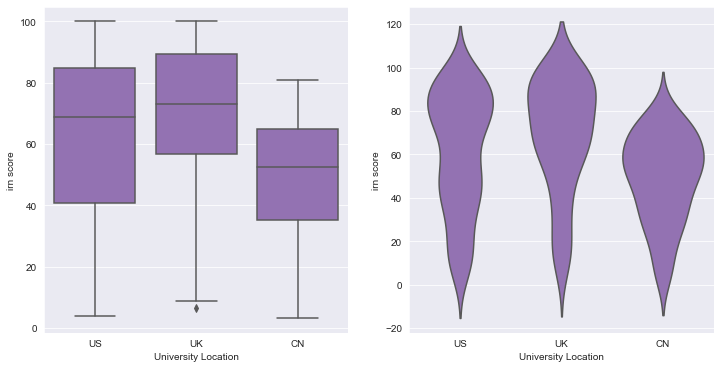

In [30]:
plot_cat_rel('irn score')

In terms of research Network, the UK has scored more reputation than the US and the Canada

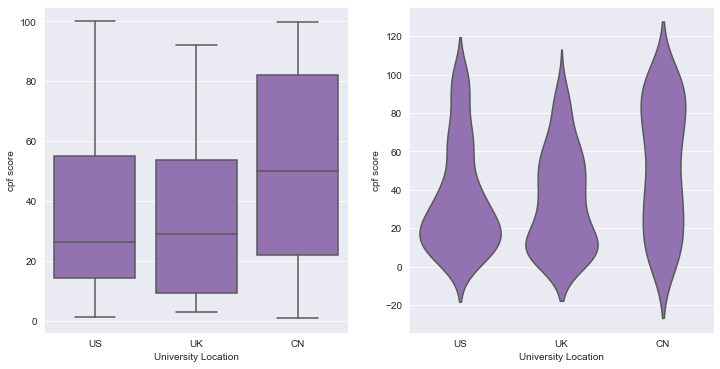

In [31]:
plot_cat_rel('cpf score')

Citation per faculty ratio, Canada scored more than the US and the UK with US has more dispered citations than the UK and Canada

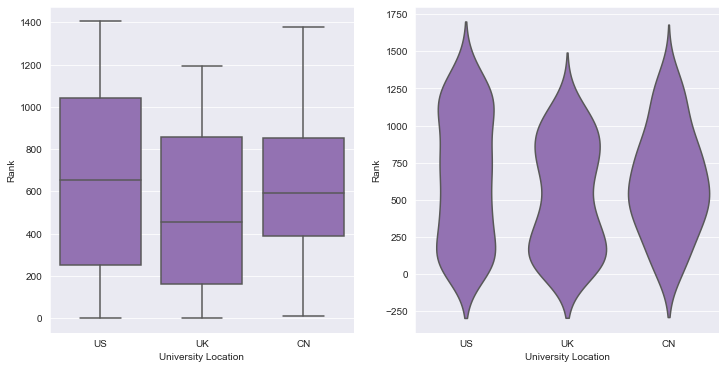

In [32]:
plot_cat_rel('Rank')

In terms of overall ranking US universities got good ranking and more variability than the rest.

Now, we can look at the ranks across the world, US, UK, and Canada in that order.

In [33]:
def plot_top_20_ranks(df=uni_df,loc=''):
    plt.figure(figsize=(6,7))
    sns.barplot(data=df, x='score scaled',y='institution', color='tab:purple')
    if loc:
        plt.title(f'Top 10 Universities in the {loc}')
    else:
        plt.title(f'Top 10 Universities in the World')

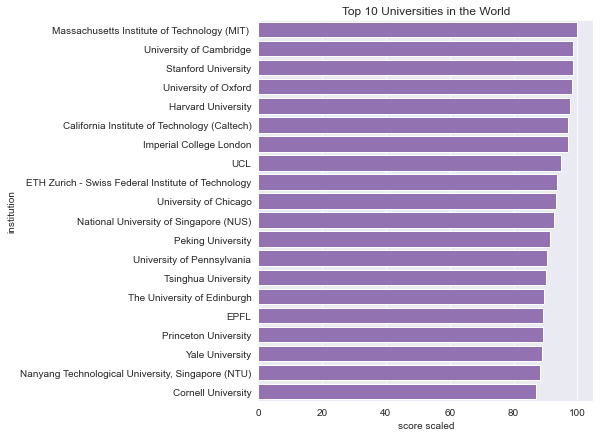

In [34]:
#top 20 University in the world
dd = uni_df[['Rank','score scaled','institution']][:20]
plot_top_20_ranks(dd)


MIT is the best University to go for studies in the world best on the six ranking indicators

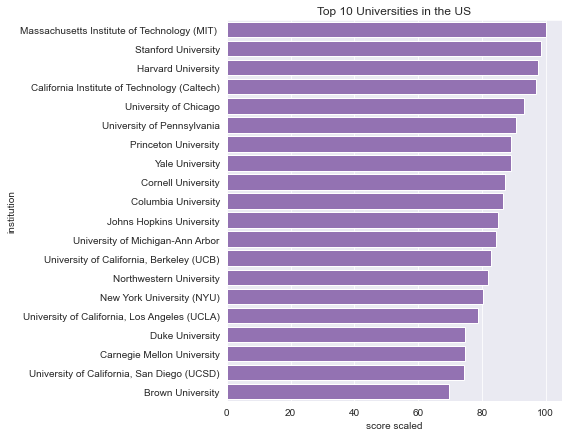

In [35]:
dd = uni_df[uni_df['location code']=='US'][['Rank','score scaled','institution']][:20]
plot_top_20_ranks(dd,'US')

MIT is the best in the United State 

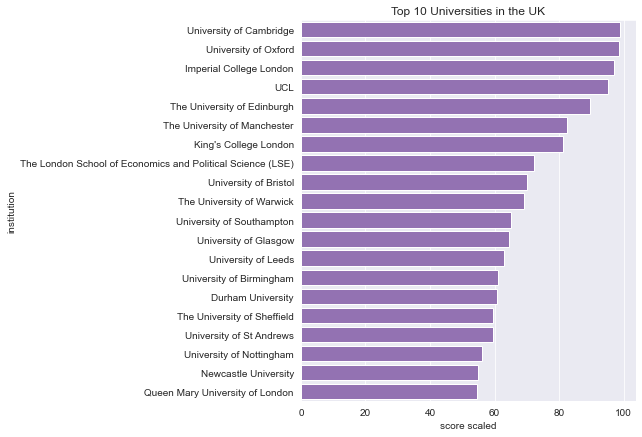

In [36]:
dd = uni_df[uni_df['location code']=='UK'][['Rank','score scaled','institution']][:20]
plot_top_20_ranks(dd,'UK')

University of Cambridge is the best University to go for study in the United Kingdom. 

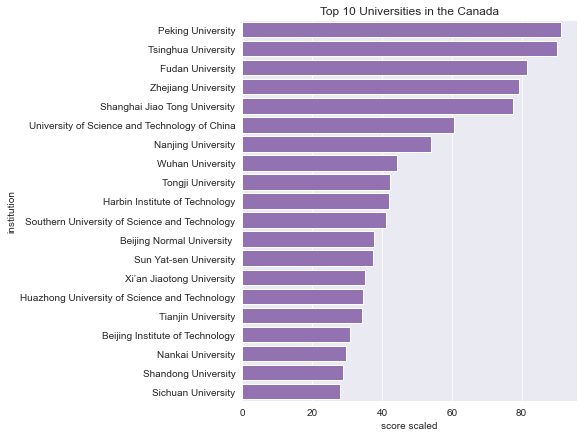

In [37]:
dd = uni_df[uni_df['location code']=='CN'][['Rank','score scaled','institution']][:20]
plot_top_20_ranks(dd, 'Canada')

Peking University leads the ranking in Canada

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There's a roughly strong relationship between academic reputation ratio (ar score) and employment reputation ratio (er score) of a university. The relationship between international student ratio (isr score) and international faculty ratio (ifr score) tends to be not that strong as potrayed by the Pearson correlation coefficient. 
Even though University in the US ranks above UK and Canada in overall ranking, but must of the key ranking indicators are dominated by the UK universities.
 
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There's no significant relationship between the six indicators with international research  network (irn) and the same applies to employment outcome (ger). No further exploration of this variables.

## Multivariate Exploration

Let's start with two numerical variable and one categorical variable using location (US, UK, CN)

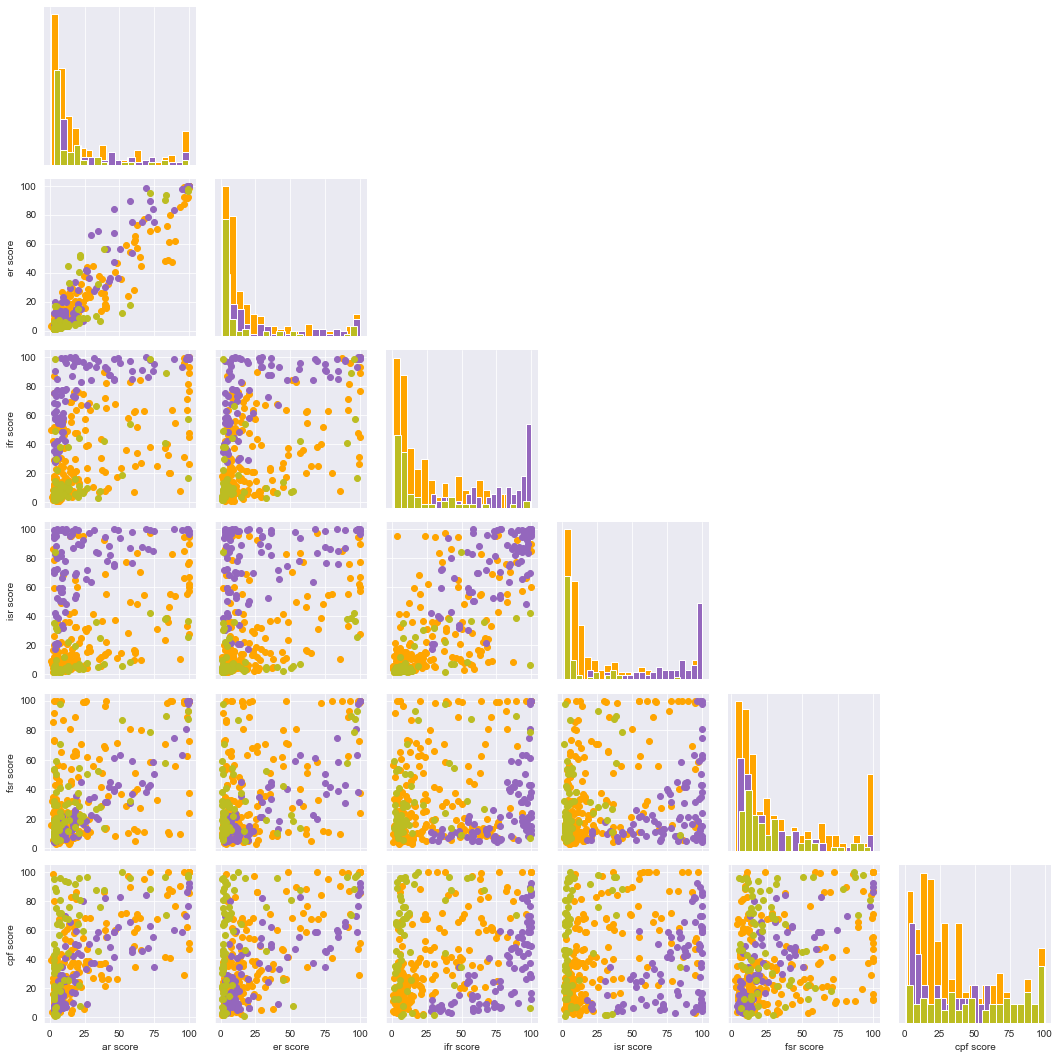

In [38]:
#let's plot pairwise plot of our relationship variables with location
g = sns.PairGrid(data = uni_df1, vars = ranking_ind, diag_sharey = False, corner = True, hue='location code', palette=['orange','tab:purple','tab:olive'])
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [39]:
#first function for ploting 2 numeric one categorical
def plot_3d(x,y,z='location code'):
    '''
    This function plot the distribution of x and y encode with z variable
    inputs:
        x: the variable on the x axis
        y: the variable on the y axis
        z: the variable to be encode using non-positional encoding
    return:
        a scatter plot with color encoding.
    '''
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=uni_df1, x=x,y=y,hue=z,palette=['orange','tab:purple','green'])
    plt.title(f'Relationship between {x} with {y} based on {z}')
    plt.ylabel(y)
    plt.xlabel(x)
    plt.legend(title=z,title_fontsize=20,loc='center left', bbox_to_anchor=(1, 0.9)) 
 

In [40]:
#second function for ploting all numeric
def plot_3dN(x,y,z='Rank'):
    '''
    This function plot the distribution of x and y encode with z variable
    inputs:
        x: the variable on the x axis
        y: the variable on the y axis
        z: the variable to be encode using non-positional encoding
    return:
        a scatter plot with sequential color encoding.
    '''
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=uni_df1, x=x,y=y,hue=z)
    plt.title(f'Relationship between {x} with {y} based on {z}')
    plt.ylabel(y)
    plt.xlabel(x)
    plt.legend(title=z,title_fontsize=20,loc='center left', bbox_to_anchor=(1, 0.85))

let's plot the relationships clearly in each plot

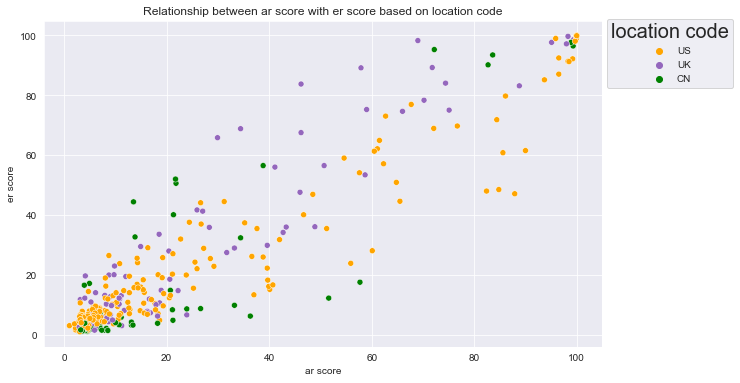

In [41]:
plot_3d('ar score','er score')

We can see most of the points are closer to zero and closer to the edge at the top, US has more points with UK points more higher.

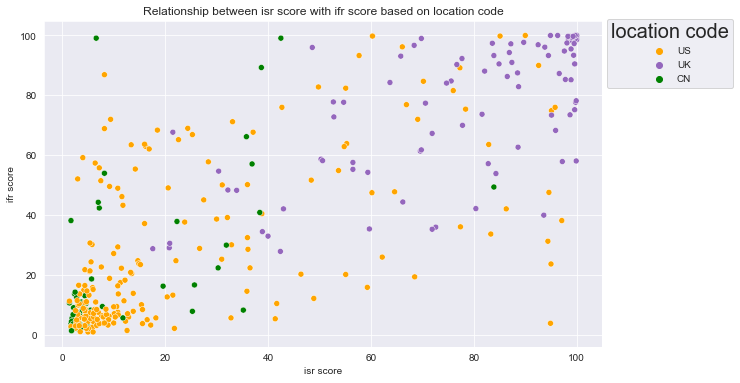

In [42]:
plot_3d('isr score','ifr score')

UK based universities tend to have higher isr score and higher ifr score. 

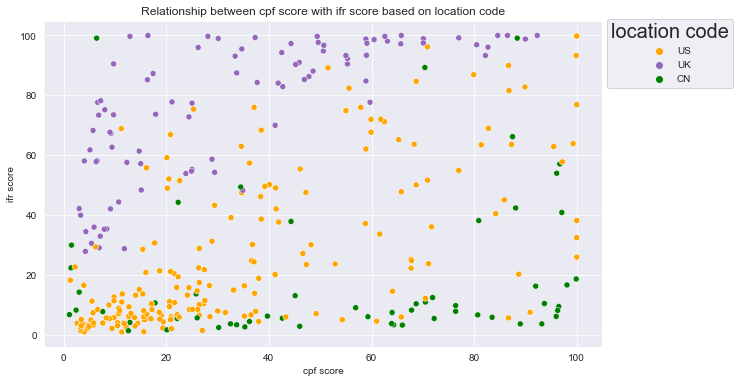

In [43]:
plot_3d('cpf score','ifr score')

UK varsities get more high ifr score than others while US get lower ifr and cpf scores.

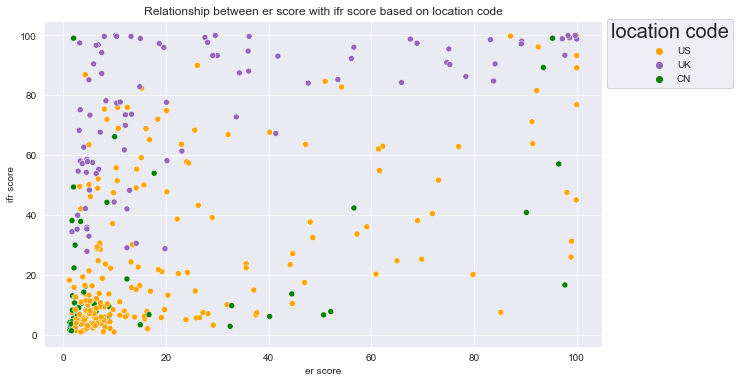

In [44]:
plot_3d('er score','ifr score')

UK varsities outperform other varsities in terms of high ifr score but get lower in er score while US majority of its varsities get lower ifr and er score

let's explore three numerical variables

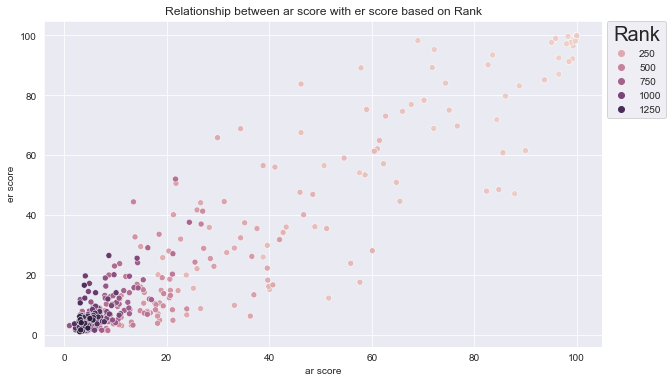

In [45]:
plot_3dN('ar score','er score','Rank')

We can see that those universities with lower er score and ar score tend to get lower ratings. as seen most points are darker, while high er score, ar score gets you top rank. 

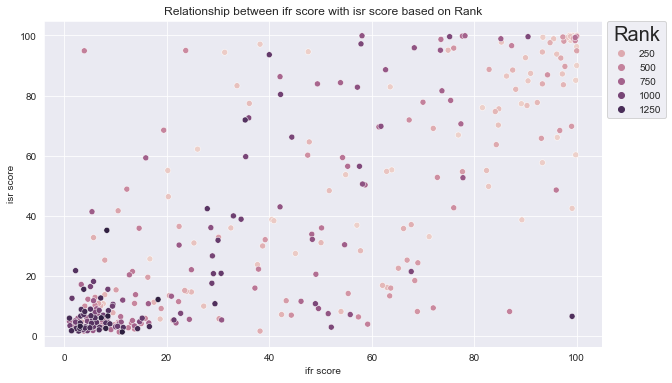

In [46]:
plot_3dN('ifr score','isr score','Rank')

So, also here, higher ifr score and higher isr score, gets you the top ranking.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between International Faculty ratio and International Student ratio confirm to us that UK high scores in both ifr score and isr score
Secondly, we can say no any UK varsity get ifr score less than 20. And as it increases so also cpf score increases.
Lastly, the strong relationship between er score and ar score is confirmed as must universities with ranking get higher score in er score and ar score.

### Were there any interesting or surprising interactions between features?

> I'm just by how the plots compliments my previous bivariate plots.

## Conclusions
> University ranking is very important case study that a student need to explore before pursuing his ambition to enrolled in  a particular program from a chosen institution, what are the driven factors that will motivate the student to choose a particular institution over the other. In our Analysis, we have found that, even though ranking is very important let's not forget academic reputation ratio, employment reputation ratio, and international faculty and student ratio. MIT is the Number one University in the world in the year 2023, because it has scored well on this ranking indicators that shows they are the most important in contributing to the rank, that is the academic reputation ratio which take 40% of the ranking and employment reputation ration which take 20%.